effect size matteres with sampe size... 

power and confidence ... if assuming effect size, we can compute power, but if the sample is big, we can find th likely effect size ... (what)

when the only thing you care about is median difference... Mann Whitney

when you care about the distribution difference... KS test

The distributions are gonna be weird ... do a permutation test ...

piower will be high because we have a large sample size



In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
'''
Columns are:
1. Average Rating (the arithmetic mean of all individual quality ratings of this professor)
2. Average Difficulty (the arithmetic mean of all individual difficulty ratings of this professor)
3. Number of ratings (simply the total number of ratings these averages are based on)
4. Received a “pepper”? (Boolean - was this professor judged as “hot” by the students?)
5. The proportion of students that said they would take the class again
6. The number of ratings coming from online classes
7. Male gender (Boolean – 1: determined with high confidence that professor is male)
8. Female (Boolean – 1: determined with high confidence that professor is female)
'''
numDat = pd.read_csv('rmpCapstoneNum.csv', header=None)
numDat.columns = ['Average Rating', 'Average Difficulty', 'Number of ratings', 'Received a pepper', 
                       'Proportion of students that said they would take the class again', 
                       'Number of ratings coming from online classes', 'Male Professor', 'Female Professor']


2. Is there a gender difference in the spread (variance/dispersion) of the ratings distribution?

Plan:

Part 1.) investigate confounds.

Part 2.) Stratify the data to correct for confounds if necessary.

Part 3.) Visualize the variance.

Part 4.) Perform levenes sig test

Null Hyp: "Variances in ratings between men and women professors are equal"

Alt Hyp: "Variances in ratings between men and women professors are not equal"
We use a sig level of .005 to 

NOTE: Before performing any analysis, we only consider professors who have at least 10 ratings and only Male and Female (Male Professor != Female Professor)

In [15]:
# Step 1: Keep rows where 'Number of ratings' is greater or equal to 10
numDat = numDat.loc[numDat['Number of ratings'] >= 10]

# Step 2: Remove rows where 'Male Professor' and 'Female Professor' are both 0 or both 1
numDat = numDat.loc[
    ~((numDat['Male Professor'] == 0) & (numDat['Female Professor'] == 0)) &
    ~((numDat['Male Professor'] == 1) & (numDat['Female Professor'] == 1))
]

# Display the final filtered dataset
numDat


,Average Rating,Average Difficulty,Number of ratings,Received a pepper,Proportion of students that said they would take the class again,Number of ratings coming from online classes,Male Professor,Female Professor
5,3.5,3.3,22.0,0.0,56.0,7.0,1,0
21,2.6,4.1,10.0,0.0,NaN,0.0,1,0
25,4.3,3.3,16.0,1.0,83.0,0.0,0,1
39,3.5,3.2,20.0,1.0,NaN,0.0,1,0
40,1.8,3.8,15.0,0.0,22.0,1.0,0,1
...,...,...,...,...,...,...,...,...
89810,3.4,3.4,14.0,0.0,54.0,5.0,1,0
89841,4.2,3.8,11.0,0.0,NaN,0.0,0,1
89855,4.0,1.9,11.0,1.0,60.0,0.0,1,0
89866,4.4,3.6,14.0,1.0,88.0,0.0,0,1


### Part 1.) Investigate Confounds

Boston University Definition of Confound: The confounding factor must be related to both the groups being compared and the result being measured. The confounding factor must not be evenly spread across the groups being compared. The confounding factor cannot be part of the cause-and-effect link between the groups and the result.
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704-ep713_confounding-em/BS704-EP713_Confounding-EM3.html

To find out whether there is a true spread in variance in the distribution of ratings of proifessors solely based on GENDER, we need to account for variables that have an impact on the variance independently of gender. Maybe difference in distribution of the variance of ratings is NOT about being a man or woman but about something else! Some other variable that imay lead us to belive there is a difference in ratings based on gender alone. We aim to find these confounds. 
We cannot control for confounds that are not in our data, so we will focus on the predictors that we have (column names)... Possible confounds to study [Average difficulty, number of ratings, received pepper, proportion that wouid take again, ratings from online]...

#### Is online course rating a confound?

In [ ]:
# Is the number of ratings from online class a confound?

# Significant difference in number of ratings from online classes between male and female professors?

from scipy.stats import mannwhitneyu

# Separate the data into male and female professors
male_online = numDat[numDat['Male Professor'] == 1]['Number of ratings coming from online classes']
female_online = numDat[numDat['Female Professor'] == 1]['Number of ratings coming from online classes']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(male_online, female_online, alternative='two-sided')

# Calculate medians for additional context
male_mean = male_online.mean()
female_mean = female_online.mean()

# Print the results
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")
print(f"Mean number of online ratings (Male): {male_mean}")
print(f"Mean number of online ratings (Female): {female_mean}")

# Compare medians to determine which group tends to have more online ratings
if male_mean > female_mean:
    print("Male professors tend to have more online ratings than female professors.")
elif male_mean < female_mean:
    print("Female professors tend to have more online ratings than male professors.")
else:
    print("Male and female professors have the same mean number of online ratings.")

# Interpret the results
if p_value < 0.005:
    print("There is a significant difference in the number of online ratings between male and female professors.")
else:
    print("There is no significant difference in the number of online ratings between male and female professors.")


Mann-Whitney U Statistic: 5929380.0
P-value: 7.3909862158361805e-06
Mean number of online ratings (Male): 0.653373463757211
Mean number of online ratings (Female): 0.8787684413085312
Female professors tend to have more online ratings than male professors.
There is a significant difference in the number of online ratings between male and female professors.


Since pvalue is well below .005, we conclude that there is a sig difference in number of ratings coming from online classes between male and female professors.
This means that we need to continue investigating potential confound. 
This gives us first part of Part 1.) that the potential confound is related to the groups being compared.
It also gives us Part 2.) that there is a difference in distribution. We still need second part of Part 1.) to see if the potential confound impacts the variance in ratings between men and women. And Part 3.) If the confound is part of causal pathway... We will now look at the impact on variance.

In [24]:
# We check if the confounding factor impacts the variance between the two groups
# we test difference in variance between man and woman profs when we only consider in person
# we test difference in variance between man and woman profs when we consider online

from scipy.stats import levene

# Separate data based on the confound: online vs. in-person classes
online_data = numDat[numDat['Number of ratings coming from online classes'] > 0]
in_person_data = numDat[numDat['Number of ratings coming from online classes'] == 0]

# Perform Levene's test for online classes
online_male_ratings = online_data[online_data['Male Professor'] == 1]['Average Rating']
online_female_ratings = online_data[online_data['Female Professor'] == 1]['Average Rating']
stat_online, p_value_online = levene(online_male_ratings, online_female_ratings)

# Perform Levene's test for in-person classes
in_person_male_ratings = in_person_data[in_person_data['Male Professor'] == 1]['Average Rating']
in_person_female_ratings = in_person_data[in_person_data['Female Professor'] == 1]['Average Rating']
stat_in_person, p_value_in_person = levene(in_person_male_ratings, in_person_female_ratings)

# Print results
print("Levene's Test for Online Classes")
print(f"Statistic: {stat_online}, P-value: {p_value_online}")
if p_value_online < 0.005:
    print("Significant difference in variance for online classes.")
else:
    print("No significant difference in variance for online classes.")

print("\nLevene's Test for In-Person Classes")
print(f"Statistic: {stat_in_person}, P-value: {p_value_in_person}")
if p_value_in_person < 0.005:
    print("Significant difference in variance for in-person classes.")
else:
    print("No significant difference in variance for in-person classes.")


Levene's Test for Online Classes
Statistic: 1.2401385021064766, P-value: 0.26560347477452384
No significant difference in variance for online classes.

Levene's Test for In-Person Classes
Statistic: 10.258252461918532, P-value: 0.0013686182167673385
Significant difference in variance for in-person classes.


We have showed part 1 and part 2 of the definition of confound... We need part 3 to finally assert that this is a confound.

In [25]:
from scipy.stats import levene

# Perform Levene's test between male and female professors (ignoring confound)
male_ratings = numDat[numDat['Male Professor'] == 1]['Average Rating']
female_ratings = numDat[numDat['Female Professor'] == 1]['Average Rating']

# Levene's test for variance differences
stat, p_value = levene(male_ratings, female_ratings)
print(f"Model 1 - Levene's Test (Without Confound): Statistic={stat}, P-value={p_value}")

if p_value < 0.005:
    print("Significant difference in variance between male and female professors (ignoring confound).")
else:
    print("No significant difference in variance between male and female professors (ignoring confound).")


Model 1 - Levene's Test (Without Confound): Statistic=9.24049619037024, P-value=0.0023758275835819506
Significant difference in variance between male and female professors (ignoring confound).


the variance in distribution is significantly different when we completely igonore the potential confound.

In [27]:
# Stratify by online/in-person classes
online_data = numDat[numDat['Number of ratings coming from online classes'] > 0]
in_person_data = numDat[numDat['Number of ratings coming from online classes'] == 0]

# Levene's test for online classes
online_male = online_data[online_data['Male Professor'] == 1]['Average Rating']
online_female = online_data[online_data['Female Professor'] == 1]['Average Rating']
stat_online, p_online = levene(online_male, online_female)
print(f"Model 2 - Online Classes: Statistic={stat_online}, P-value={p_online}")

# Levene's test for in-person classes
in_person_male = in_person_data[in_person_data['Male Professor'] == 1]['Average Rating']
in_person_female = in_person_data[in_person_data['Female Professor'] == 1]['Average Rating']
stat_in_person, p_in_person = levene(in_person_male, in_person_female)
print(f"Model 2 - In-Person Classes: Statistic={stat_in_person}, P-value={p_in_person}")


Model 2 - Online Classes: Statistic=1.2401385021064766, P-value=0.26560347477452384
Model 2 - In-Person Classes: Statistic=10.258252461918532, P-value=0.0013686182167673385


the variance in distribution is NOT sig different between male and female when professors have at least 1 rating coming online course.
the variance in distribution is significantly different when considering only in person classes.
The confound (online ratings) is not a step in the cause-and-effect chain from gender to variance.
Instead:

Gender affects variance independently in in-person settings.
Online ratings change the context but do not explain how gender influences variance.

Since this variable fails to meet the third criteria of the definition of confound, it is not a confound. So we do not need to control for online classes when we study the differences in distribution.

#### Is the amount of students who say they will take the class again a confound?

In [32]:
# Check for missing values in the column
print(numDat['Proportion of students that said they would take the class again'].isnull().sum())

# Drop rows with missing values in the relevant column
numDat_cleaned = numDat.dropna(subset=['Proportion of students that said they would take the class again'])

from scipy.stats import mannwhitneyu

# Separate the proportions by gender
male_proportion = numDat_cleaned[numDat_cleaned['Male Professor'] == 1]['Proportion of students that said they would take the class again']
female_proportion = numDat_cleaned[numDat_cleaned['Female Professor'] == 1]['Proportion of students that said they would take the class again']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(male_proportion, female_proportion, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.005:
    print("The proportion of students who would take the class again significantly differs between male and female professors.")
else:
    print("No significant difference in the proportion of students who would take the class again between genders.")


1142
Mann-Whitney U Statistic: 4608783.0
P-value: 0.00029544289907204883
The proportion of students who would take the class again significantly differs between male and female professors.


In [35]:
print(numDat['Proportion of students that said they would take the class again'].describe())
high_proportion = numDat[numDat['Proportion of students that said they would take the class again'] >= 0.5]['Average Rating']
low_proportion = numDat[numDat['Proportion of students that said they would take the class again'] < 0.5]['Average Rating']

count    5963.000000
mean       77.869864
std        24.172397
min         4.000000
25%        64.000000
50%        86.000000
75%       100.000000
max       100.000000
Name: Proportion of students that said they would take the class again, dtype: float64


In [36]:
median_value = numDat['Proportion of students that said they would take the class again'].median()

# Split into high and low groups
high_proportion = numDat[numDat['Proportion of students that said they would take the class again'] >= median_value]['Average Rating']
low_proportion = numDat[numDat['Proportion of students that said they would take the class again'] < median_value]['Average Rating']

# Perform Levene's Test
stat, p_value = levene(high_proportion, low_proportion)
print(f"Levene's Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.005:
    print("The proportion of students who said they would take the class again significantly affects the variance in ratings.")
else:
    print("No significant effect of the proportion of students who said they would take the class again on variance in ratings.")

Levene's Test Statistic: 1450.843490788304
P-value: 2.4637706485448985e-284
The proportion of students who said they would take the class again significantly affects the variance in ratings.


Part 1 from the definition is satisfied.

In [38]:
# Drop rows with missing values in the relevant column
numDat_cleaned = numDat.dropna(subset=['Proportion of students that said they would take the class again'])

# Test for significant difference
male_proportion = numDat_cleaned[numDat_cleaned['Male Professor'] == 1]['Proportion of students that said they would take the class again']
female_proportion = numDat_cleaned[numDat_cleaned['Female Professor'] == 1]['Proportion of students that said they would take the class again']

# Perform Mann-Whitney U Test
stat, p_value = mannwhitneyu(male_proportion, female_proportion, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.005:
    print("The distributions of proportions significantly differ between male and female professors.")
else:
    print("No significant difference in the distributions of proportions between male and female professors.")

Mann-Whitney U Statistic: 4608783.0
P-value: 0.00029544289907204883
The distributions of proportions significantly differ between male and female professors.


Part 2 is satisfied

In [40]:
# Calculate the median proportion
median_value = numDat['Proportion of students that said they would take the class again'].median()

# Split the dataset into high and low proportion groups
high_proportion = numDat[numDat['Proportion of students that said they would take the class again'] >= median_value]
low_proportion = numDat[numDat['Proportion of students that said they would take the class again'] < median_value]

# Levene's test for the high proportion group
male_high = high_proportion[high_proportion['Male Professor'] == 1]['Average Rating']
female_high = high_proportion[high_proportion['Female Professor'] == 1]['Average Rating']
stat_high, p_high = levene(male_high, female_high)

# Levene's test for the low proportion group
male_low = low_proportion[low_proportion['Male Professor'] == 1]['Average Rating']
female_low = low_proportion[low_proportion['Female Professor'] == 1]['Average Rating']
stat_low, p_low = levene(male_low, female_low)

# Print results
print(f"High Proportion Group - Levene's Test: Statistic={stat_high}, P-value={p_high}")
print(f"Low Proportion Group - Levene's Test: Statistic={stat_low}, P-value={p_low}")

High Proportion Group - Levene's Test: Statistic=0.432246476530565, P-value=0.5109382361952286
Low Proportion Group - Levene's Test: Statistic=0.5362513575446983, P-value=0.4640495263049311


If we account for the proportions, gender no longer impacts variance! This means that the proportion is the mediator between gender and variance ... 
When we remove the proportion, there is no longer affect of gender on the variance...  This means it is a mediator ... Example would be a stufy on happiness and exercise... 
excercise leads to happiness ... exercise leads to physical health which leads to happiness.... 
here the physical health is the mediator ... it is what enects to effect of the previous variable... so it is not a confound.
for this example... something like sleep would be a confound ...exercise improves sleep whcih improves happiness but the sleep isnt necessarily the reason happiness increased ... if we remove sleep, we get a better read on how exercise impacts happiness.

Part 3 is not satisfied. Proportions is a mediator not confound

Received a pepper

#### Part 1

In [41]:
# Part 1: Test if 'Received a pepper' is related to gender
male_pepper = numDat[numDat['Male Professor'] == 1]['Received a pepper']
female_pepper = numDat[numDat['Female Professor'] == 1]['Received a pepper']

# Perform Mann-Whitney U Test
stat_gender, p_value_gender = mannwhitneyu(male_pepper, female_pepper, alternative='two-sided')

# Part 2: Test if 'Received a pepper' is related to variance in ratings
pepper_yes = numDat[numDat['Received a pepper'] == 1]['Average Rating']
pepper_no = numDat[numDat['Received a pepper'] == 0]['Average Rating']

# Perform Levene's Test
stat_variance, p_value_variance = levene(pepper_yes, pepper_no)

# Print results for Step 1
print(f"Step 1: Test if 'Received a pepper' is Related to Both Gender and Variance")
print(f"Part 1: Mann-Whitney U Test (Gender): Statistic={stat_gender}, P-value={p_value_gender}")
if p_value_gender < 0.005:
    print("Significant relationship between 'Received a pepper' and gender.")
else:
    print("No significant relationship between 'Received a pepper' and gender.")

print(f"Part 2: Levene's Test (Variance): Statistic={stat_variance}, P-value={p_value_variance}")
if p_value_variance < 0.005:
    print("'Received a pepper' significantly affects variance in ratings.")
else:
    print("'Received a pepper' does not significantly affect variance in ratings.")

Step 1: Test if 'Received a pepper' is Related to Both Gender and Variance
Part 1: Mann-Whitney U Test (Gender): Statistic=6044025.0, P-value=0.020832155509970918
No significant relationship between 'Received a pepper' and gender.
Part 2: Levene's Test (Variance): Statistic=1320.4893622163518, P-value=2.4485463584329578e-265
'Received a pepper' significantly affects variance in ratings.


We see above that there is no significant difference between men and women receiving peppers. They are both equally likely. So, 'Received a pepper' is not a confound

Average Difficulty

#### Part 1

In [42]:
# Part 1: Test if 'Average Difficulty' is related to gender
male_difficulty = numDat[numDat['Male Professor'] == 1]['Average Difficulty']
female_difficulty = numDat[numDat['Female Professor'] == 1]['Average Difficulty']

# Perform Mann-Whitney U Test
stat_gender_difficulty, p_value_gender_difficulty = mannwhitneyu(male_difficulty, female_difficulty, alternative='two-sided')

# Part 2: Test if 'Average Difficulty' is related to variance
# Define high and low groups based on the median difficulty
difficulty_high = numDat[numDat['Average Difficulty'] >= numDat['Average Difficulty'].median()]['Average Rating']
difficulty_low = numDat[numDat['Average Difficulty'] < numDat['Average Difficulty'].median()]['Average Rating']

# Perform Levene's Test
stat_variance_difficulty, p_value_variance_difficulty = levene(difficulty_high, difficulty_low)

# Print results for Step 1
print(f"Step 1: Test if 'Average Difficulty' is Related to Both Gender and Variance")
print(f"Part 1: Mann-Whitney U Test (Gender): Statistic={stat_gender_difficulty}, P-value={p_value_gender_difficulty}")
if p_value_gender_difficulty < 0.005:
    print("Significant relationship between 'Average Difficulty' and gender.")
else:
    print("No significant relationship between 'Average Difficulty' and gender.")

print(f"Part 2: Levene's Test (Variance): Statistic={stat_variance_difficulty}, P-value={p_value_variance_difficulty}")
if p_value_variance_difficulty < 0.005:
    print("'Average Difficulty' significantly affects variance in ratings.")
else:
    print("'Average Difficulty' does not significantly affect variance in ratings.")

Step 1: Test if 'Average Difficulty' is Related to Both Gender and Variance
Part 1: Mann-Whitney U Test (Gender): Statistic=6192402.0, P-value=0.7855271637343776
No significant relationship between 'Average Difficulty' and gender.
Part 2: Levene's Test (Variance): Statistic=1254.02897299669, P-value=4.1303291864652794e-253
'Average Difficulty' significantly affects variance in ratings.


Since we check for confounds and none are confounds, we can test the difference in the variance between the two genders using the original dataset ...

In [43]:
# Separate ratings by gender
male_ratings = numDat[numDat['Male Professor'] == 1]['Average Rating']
female_ratings = numDat[numDat['Female Professor'] == 1]['Average Rating']

# Perform Levene's Test
stat, p_value = levene(male_ratings, female_ratings)

# Print results
print(f"Levene's Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.005:
    print("There is a significant difference in the variance of rating distribution between male and female professors.")
else:
    print("There is no significant difference in the variance of rating distribution between male and female professors.")


Levene's Test Statistic: 9.24049619037024
P-value: 0.0023758275835819506
There is a significant difference in the variance of rating distribution between male and female professors.


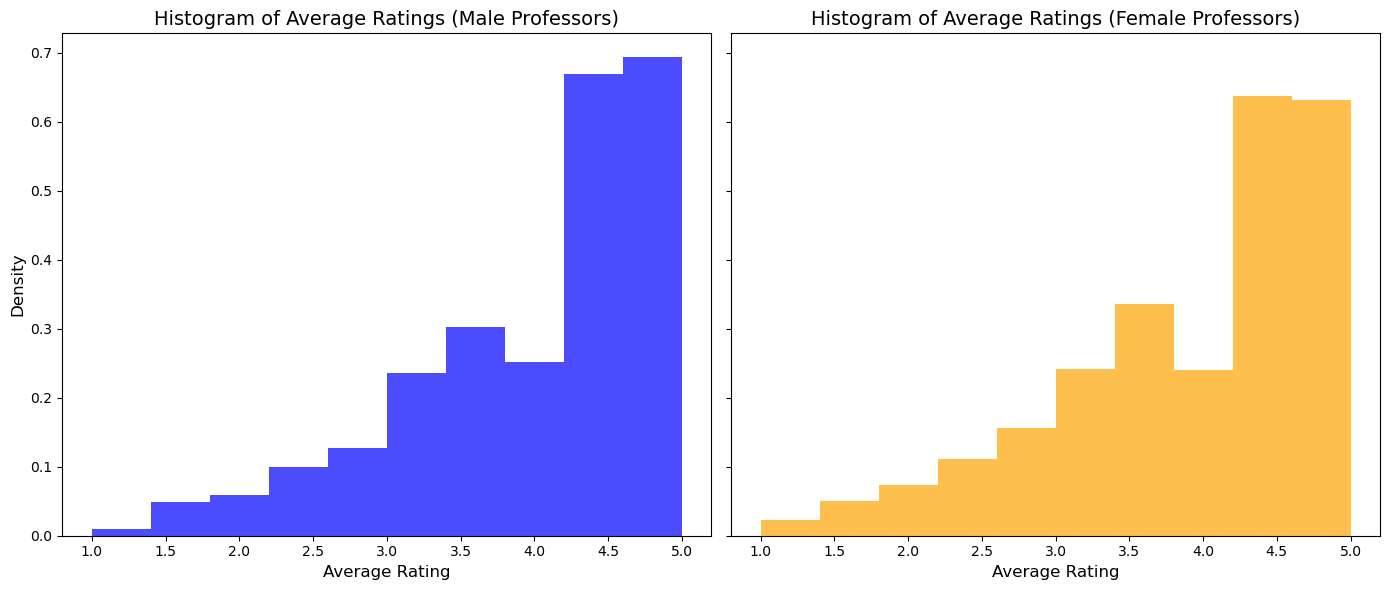

In [46]:
#### Below we plot the two distributions

import matplotlib.pyplot as plt

# Separate male and female professor data
male_data = numDat[numDat['Male Professor'] == 1]['Average Rating']
female_data = numDat[numDat['Female Professor'] == 1]['Average Rating']

# Create subplots for histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Male professor histogram
axes[0].hist(male_data, bins=10, alpha=0.7, color='blue', density=True)
axes[0].set_title('Histogram of Average Ratings (Male Professors)', fontsize=14)
axes[0].set_xlabel('Average Rating', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Female professor histogram
axes[1].hist(female_data, bins=10, alpha=0.7, color='orange', density=True)
axes[1].set_title('Histogram of Average Ratings (Female Professors)', fontsize=14)
axes[1].set_xlabel('Average Rating', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()



In both cases there is a significant difference in the variance of ratings between male and female subjects.

In [56]:
import numpy as np

# Compute variances

var_male2 = np.var(male_data2, ddof=1)
var_female2 = np.var(female_data2, ddof=1)

print(f"Variance of Male Data 2: {var_male2}")
print(f"Variance of Female Data 2: {var_female2}")


Variance of Male Data 2: 0.7349135518332334
Variance of Female Data 2: 0.8070924350172214


The ratings for female professor is more inconsistent with a higher variance of .8
The ratings for male professors is more consistent with a variance of about .7

In [57]:
print(f"Male Data Size: {len(male_data2)}")
print(f"Female Data Size: {len(female_data2)}")

Male Data Size: 3987
Female Data Size: 3118


In [58]:
import numpy as np

# Calculate mean and standard deviation
mean_male1 = np.mean(male_data1)
mean_female1 = np.mean(female_data1)
std_male1 = np.std(male_data1, ddof=1)
std_female1 = np.std(female_data1, ddof=1)

# Coefficient of variation
cv_male1 = std_male1 / mean_male1
cv_female1 = std_female1 / mean_female1

print(f"CV for Male Professors (Group 1): {cv_male1}")
print(f"CV for Female Professors (Group 1): {cv_female1}")


CV for Male Professors (Group 1): 0.21429927763122836
CV for Female Professors (Group 1): 0.22899738190211494
